In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/2019130521-심서현/data/recipeData/'

In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

# Original Data

In [15]:
recipes = pd.read_csv(path + 'RAW_recipes.csv')

In [8]:
interactions = pd.read_csv(path + 'RAW_interactions.csv')

In [12]:
recipes.shape

(231637, 17)

In [13]:
interactions.shape

(1132367, 5)

In [16]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Recipe Dataset Preprocessing

#### Recipe와 Interaction 간 User Id 간 일치 확인 및 불일치 값 제거

In [ ]:
# recipes와 interactions 간의 id 불일치 확인
discrepancies_in_recipes = recipes[~recipes['id'].isin(interactions['recipe_id'])]
discrepancies_in_interactions = interactions[~interactions['recipe_id'].isin(recipes['id'])]

In [ ]:
# 불일치하는 데이터 삭제
recipes = recipes[recipes['id'].isin(interactions['recipe_id'])]
interactions = interactions[interactions['recipe_id'].isin(recipes['id'])]

#### 영양성분 정보 추가

In [ ]:
recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes.nutrition.str.split(",",expand=True)

In [ ]:
recipes['calories'] =  recipes['calories'].apply(lambda x: x.replace('[',''))

In [ ]:
recipes['carbohydrates (PDV)'] =  recipes['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))

In [ ]:
recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

#### 불필요한 column 제거

In [ ]:
recipes.drop(['contributor_id','submitted','nutrition'], axis=1,inplace = True)

#### food type column 추가 및 작업

In [ ]:
recipes['food_types'] = np.nan
recipes['food_types'] = recipes['food_types'].astype('str')

In [ ]:
for i in recipes['ingredients'].index:
    if('eggs' not in recipes['ingredients'][i]):
         if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Veg dessert'
    elif('eggs' in recipes['ingredients'][i]):
        if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Non-Veg dessert'

<ipython-input-62-829901c9ea2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Veg dessert'
<ipython-input-62-829901c9ea2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Non-Veg dessert'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and 20<recipes['calories'][i]<300):
        recipes['food_types'][i]='Healthy'

<ipython-input-63-bf655b77d42f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Healthy'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy'):
        if('chicken' in recipes['ingredients'][i] or 'eggs' in recipes['ingredients'][i] or'ham' in recipes['ingredients'][i] or 'pepperoni' in recipes['ingredients'][i] ):
            recipes['food_types'][i]='Non-veg'

<ipython-input-64-4c86433c1228>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Non-veg'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy' and recipes['food_types'][i]!='Non-veg'):
        recipes['food_types'][i]='Veg'

<ipython-input-65-b691315a018f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Veg'


In [ ]:
recipes['food_types'].value_counts()

Healthy            100579
Veg                 70416
Non-veg             45948
Veg dessert          9532
Non-Veg dessert      5162
Name: food_types, dtype: int64

In [ ]:
recipes['food_types'].isnull().sum()

0

In [ ]:
recipes.head()

,name,recipe_id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),food_types
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-d

In [ ]:
recipes.rename(columns={'id': 'recipe_id'}, inplace=True)

In [ ]:
# recipes.to_csv(path + 'recipes_foodtype.csv', index=False, encoding='utf-8')

# Used Data

In [17]:
recipes = pd.read_csv(path + 'recipes_foodtype.csv')

In [18]:
interactions = pd.read_csv(path + 'RAW_interactions.csv')

## Recipes


In [19]:
recipes.head()

,name,recipe_id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),food_types
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Veg
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Veg


## Interactions

In [ ]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [20]:
# 필요한 열만 취하기
rating_df = interactions.iloc[:,[0,1,3,4]]

In [21]:
# Min-Max Scaling
rating_df['rating'] = (interactions['rating'])/5

<ipython-input-21-153ced8291a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'] = (interactions['rating'])/5


In [22]:
rating_df.head()

,user_id,recipe_id,rating,review
0,38094,40893,0.8,Great with a salad. Cooked on top of stove for...
1,1293707,40893,1.0,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,0.8,This worked very well and is EASY. I used not...
3,126440,85009,1.0,I made the Mexican topping and took it to bunk...
4,57222,85009,1.0,"Made the cheddar bacon topping, adding a sprin..."


# Encoding

In [23]:
user_ids = rating_df['user_id'].unique()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
rating_df['user'] = rating_df['user_id'].map(user2user_encoded)
n_users = len(user2user_encoded)

recipe_ids = rating_df['recipe_id'].unique()
recipe2recipe_encoded = {x: i for i, x in enumerate(recipe_ids)}
rating_df['recipe'] = rating_df['recipe_id'].map(recipe2recipe_encoded)
n_recipes = len(recipe2recipe_encoded)

In [24]:
print("Num of users: {}, Num of recipes: {}".format(n_users, n_recipes))
print("Min rating: {}, Max rating: {}".format(min(interactions['rating']), max(interactions['rating'])))

Num of users: 226570, Num of recipes: 231637
Min rating: 0, Max rating: 5


# Train Test set Split

In [25]:
from sklearn.model_selection import train_test_split

# Shuffling
rating_df = rating_df.sample(frac=1, random_state=2018150446)

# feature, target 분리
X = rating_df[['user', 'recipe']].values
y = rating_df['rating'].values

# Train 및 Test 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018150446)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

# Train, Test 데이터 numpy 배열 변환
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

> Train set ratings: 792656
> Test set ratings: 339711


In [26]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.utils.data as data
import torchvision as tv
from torch.utils.data import TensorDataset, DataLoader

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train_tensor = torch.as_tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.as_tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.as_tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.as_tensor(y_test, dtype=torch.float32).to(device)

In [28]:
print(device)
X_train_tensor_user = X_train_tensor[:,0].long()
X_train_tensor_recipe = X_train_tensor[:,1].long()
X_test_tensor_user = X_test_tensor[:,0].long()
X_test_tensor_recipe = X_test_tensor[:,1].long()

cuda


# Model Building

Recommendation Model

In [29]:
class RecommenderNet(nn.Module):
    def __init__(self, n_users, n_recipes, embedding_size=128):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_size)
        self.recipe_embedding = nn.Embedding(n_recipes, embedding_size)
        self.fc = nn.Linear(embedding_size * 2, 1)
        self.out = nn.Sigmoid()

    def forward(self, user, recipe):
        user_embedded = self.user_embedding(user)
        recipe_embedded = self.recipe_embedding(recipe)
        x = torch.cat([user_embedded, recipe_embedded], dim=-1)
        x = self.fc(x.view(x.size(0), -1))
        return self.out(x)

* Dataloader, Loss Fuction, Optimizer, Scheduler 설정

In [30]:
batch_size = 128

train_data = TensorDataset(X_train_tensor_user, X_train_tensor_recipe, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test_tensor_user, X_test_tensor_recipe, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


start_lr = 0.01
min_lr = 0.0001
max_lr = 0.1



rampup_epochs = 5
sustain_epochs = 0
exp_decay = .85

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr

In [31]:
# model, loss 함수, optimizer, scheduler 초기화
model = RecommenderNet(n_users, n_recipes).to('cuda')
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

# 체크포인트 저장 경로
checkpoint_filepath = '/content/drive/MyDrive/2019130521-심서현/weights.pth'

# 학습 루프
train_losses, test_losses = [], []
best_loss = float('inf')
patience_counter = 0

# Training

In [32]:
for epoch in range(10):
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1

    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.5490655115130797, Test Loss: 0.4439068779562682
Epoch 2, Train Loss: 0.3699871380331442, Test Loss: 0.3469400230651973
Epoch 3, Train Loss: 0.3346431054765605, Test Loss: 0.3397539140545702
Epoch 4, Train Loss: 0.31696108125310213, Test Loss: 0.3391700311821479
Epoch 5, Train Loss: 0.2986040149258813, Test Loss: 0.3434149986294399
Epoch 6, Train Loss: 0.28091664914743747, Test Loss: 0.3523160921467276
Epoch 7, Train Loss: 0.26173901160429736, Test Loss: 0.36669491264567666


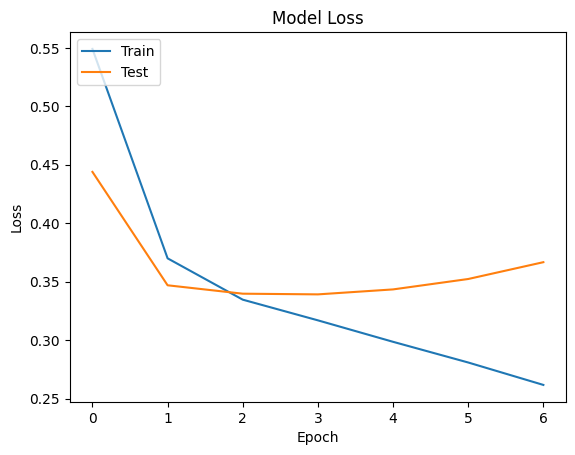

In [33]:
#Training results
plt.plot(train_losses)
plt.plot(test_losses)
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

Embedding Layer의 가중치를 추출하고 정규화

In [34]:
model = RecommenderNet(n_users, n_recipes)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

checkpoint_filepath = '/content/drive/MyDrive/딥러닝/weights.pth'

checkpoint = torch.load('/content/drive/MyDrive/딥러닝/weights.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']
best_loss = checkpoint['loss']
train_losses = checkpoint['train_loss_history']
test_losses = checkpoint['test_loss_history']

Extracting weights from model

In [35]:
def extract_weights(name, model):
    weight_layer = getattr(model, name)
    weights = weight_layer.weight.data
    norm = weights.norm(p=2, dim=1, keepdim=True)
    normalized_weights = weights.div(norm)
    return normalized_weights

# 모델에서 가중치 추출
recipe_weights = extract_weights('recipe_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [36]:
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Recommendation Building Test

## Task1: Item Based Recommendation

In [37]:
df1 = recipes

# Recipe ID나 이름을 입력으로 받아 해당하는 Recipe 정보가 담긴 DataFrame을 반환
def getRecipeFrame(recipe):
    if isinstance(recipe, int):
        return df1[df1.recipe_id == recipe]
    if isinstance(recipe, str):
        return df1[df1.name == recipe]

In [38]:
weights = recipe_weights
weights

tensor([[-0.0202,  0.0747, -0.0834,  ..., -0.0488, -0.0272,  0.0158],
        [-0.1336, -0.0835, -0.0716,  ...,  0.0741, -0.0475, -0.1160],
        [-0.0676, -0.0392,  0.0468,  ...,  0.1713, -0.2146,  0.0448],
        ...,
        [ 0.0118, -0.0514,  0.0466,  ...,  0.0246,  0.0598,  0.0748],
        [-0.1588, -0.0201, -0.0480,  ..., -0.0461,  0.0233,  0.0912],
        [ 0.0797,  0.0289, -0.0533,  ...,  0.0421,  0.0042, -0.0738]])

In [39]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())


            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]


            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity, "ingredients" : ingredients,
                                  'description': description})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))

result

In [40]:
find_similar_recipes('amish  tomato ketchup  for canning', n=10, neg=False)

Recipes closest to amish  tomato ketchup  for canning would be...


,name,similarity,ingredients,description
9,spicy asian beef and noodles,tensor(0.3696),"['beef round tip steak', 'vermicelli', 'water', 'sugar snap peas', 'carrot', 'stir-fry sauce', 'crushed red pepper flakes']","this recipe is from the national cattlemen's beef association (tip: if sugar-snap peas are not available, fresh pea pods may be substituted.)"
8,beau monde cheese bread,tensor(0.3642),"['french bread', 'butter', 'lemon juice', 'onions', 'mustard', 'beau monde spice', 'swiss cheese']",a cheese bread that is oh so yummy! my sister in law gave me this receipe and it's always a hit. i looked for other receipes on this sight with beau monde spice and only found dips. hope you love this as much as my family does! enjoy!
7,caesar salad top supreme,tensor(0.3616),"['garlic cloves', 'mayonnaise', 'anchovy fillets', 'parmesan cheese', 'worcestershire sauce', 'dijon mustard', 'lemon juice', 'salt', 'ground black pepper', 'olive oil', 'bread', 'romaine lettuce', 'roma tomatoes']","whether it's at home or in restaurants, we are always spoiled by good, fresh, caesar dressing. this recipe sounded too good to be true, so curiosity got the better of me and i dared to try it. p.s.the garlic croutons that top this classic salad are wonderful, as is the anchovy-infused, very creamy dressing."
6,annie s potato dish,tensor(0.3500),"['potatoes', 'cheese', 'sour cream', 'green onions', 'salt and pepper', 'breadcrumbs', 'butter']",this potato dish is without a doubt a very quick and tasty potato dish at any time and especially at a barbeque.i got this recipe from my friend annie.
5,curd rice,tensor(0.3481),"['rice', 'curds', 'milk', 'curry leaves', 'red chilies', 'cumin seed', 'black mustard seeds', 'asafoetida powder', 'oil', 'cashews', 'bengal gram dal', 'salt', 'sugar', 'coriander leaves']",i love eating curd since i was a baby and sindhi papad is a
4,mashed potato chocolate cake,tensor(0.3471),"['mashed potatoes', 'water', 'all-purpose flour', 'dutch-processed cocoa powder', 'instant coffee granules', 'baking soda', 'salt', 'miniature semisweet chocolate chips', 'unsalted butter', 'granulated sugar', 'vanilla', 'eggs']","i have not tried this recipe but was given this by a co-worker with a suggestion that i might need to try it ""hint hint"". so i have posted it so i will not lose it. it is supposed to be an extremely moist cake and i plan to use some of the instant mashed potatoes to make it.\r\nupdate: i have made this cake and it is a very dense cake. almost like a big brownie. my co-workers loved it but this is not a light, fluffy cake."
3,peach margarita,tensor(0.3467),"['peach schnapps', 'white tequila', 'orange juice', 'grand marnier', 'simple syrup', 'fresh peach', 'lemon juice', 'coarse sugar']",a margarita with one of my very favorite summer fruits.
2,baked broccoli with rice,tensor(0.3444),"['frozen chopped broccoli', 'onion', 'butter', 'cooked rice', 'condensed cream of mushroom soup', 'cheddar cheese']","my grandma lorraine stromgren would listen to wcco radio's joyce lamont as she broadcast a daily recipe. my grandma would sit by the radio with pencil in hand to write down those recipe favorites! a cookbook was published in 1979 after 10 years of recipes being broadcast. of over 2,000 recipes that had been broadcast, the cookbook has the recipes that were the listeners' favorites."
1,microwaved potato and onions,tensor(0.3429),"['potatoes', 'onion', 'margarine', 'salt', 'black pepper']","simple and fast. i don't ""cook"" many dishes in the microwave, but i make an exception with this. cooking time will vary by individual oven."
0,beet chickpea and almond dip,tensor(0.3427),"['beet', 'garbanzo beans', 'extra virgin olive oil', 'slivered almonds', 'garlic cloves', 'red wine vinegar']",bon appetit magazine-unknown date


## Task 2: Find Similar Recipies with Food Types

### trial 1 - 데이터프레임에 Food Type만 추가

In [41]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_2(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            # print(recipe_frame)

            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]
            food_types =  recipe_frame.food_types.values[0]

            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity, "ingredients" : ingredients,
                                  'description': description, 'food_types': food_types})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [42]:
find_similar_recipes_2('amish  tomato ketchup  for canning', n=10, neg=False)

Recipes closest to amish  tomato ketchup  for canning would be...


,name,similarity,ingredients,description,food_types
9,spicy asian beef and noodles,tensor(0.3696),"['beef round tip steak', 'vermicelli', 'water', 'sugar snap peas', 'carrot', 'stir-fry sauce', 'crushed red pepper flakes']","this recipe is from the national cattlemen's beef association (tip: if sugar-snap peas are not available, fresh pea pods may be substituted.)",Veg
8,beau monde cheese bread,tensor(0.3642),"['french bread', 'butter', 'lemon juice', 'onions', 'mustard', 'beau monde spice', 'swiss cheese']",a cheese bread that is oh so yummy! my sister in law gave me this receipe and it's always a hit. i looked for other receipes on this sight with beau monde spice and only found dips. hope you love this as much as my family does! enjoy!,Veg
7,caesar salad top supreme,tensor(0.3616),"['garlic cloves', 'mayonnaise', 'anchovy fillets', 'parmesan cheese', 'worcestershire sauce', 'dijon mustard', 'lemon juice', 'salt', 'ground black pepper', 'olive oil', 'bread', 'romaine lettuce', 'roma tomatoes']","whether it's at home or in restaurants, we are always spoiled by good, fresh, caesar dressing. this recipe sounded too good to be true, so curiosity got the better of me and i dared to try it. p.s.the garlic croutons that top this classic salad are wonderful, as is the anchovy-infused, very creamy dressing.",Veg
6,annie s potato dish,tensor(0.3500),"['potatoes', 'cheese', 'sour cream', 'green onions', 'salt and pepper', 'breadcrumbs', 'butter']",this potato dish is without a doubt a very quick and tasty potato dish at any time and especially at a barbeque.i got this recipe from my friend annie.,Veg
5,curd rice,tensor(0.3481),"['rice', 'curds', 'milk', 'curry leaves', 'red chilies', 'cumin seed', 'black mustard seeds', 'asafoetida powder', 'oil', 'cashews', 'bengal gram dal', 'salt', 'sugar', 'coriander leaves']",i love eating curd since i was a baby and sindhi papad is a,Veg
4,mashed potato chocolate cake,tensor(0.3471),"['mashed potatoes', 'water', 'all-purpose flour', 'dutch-processed cocoa powder', 'instant coffee granules', 'baking soda', 'salt', 'miniature semisweet chocolate chips', 'unsalted butter', 'granulated sugar', 'vanilla', 'eggs']","i have not tried this recipe but was given this by a co-worker with a suggestion that i might need to try it ""hint hint"". so i have posted it so i will not lose it. it is supposed to be an extremely moist cake and i plan to use some of the instant mashed potatoes to make it.\r\nupdate: i have made this cake and it is a very dense cake. almost like a big brownie. my co-workers loved it but this is not a light, fluffy cake.",Non-Veg dessert
3,peach margarita,tensor(0.3467),"['peach schnapps', 'white tequila', 'orange juice', 'grand marnier', 'simple syrup', 'fresh peach', 'lemon juice', 'coarse sugar']",a margarita with one of my very favorite summer fruits.,Healthy
2,baked broccoli with rice,tensor(0.3444),"['frozen chopped broccoli', 'onion', 'butter', 'cooked rice', 'condensed cream of mushroom soup', 'cheddar cheese']","my grandma lorraine stromgren would listen to wcco radio's joyce lamont as she broadcast a daily recipe. my grandma would sit by the radio with pencil in hand to write down those recipe favorites! a cookbook was published in 1979 after 10 years of recipes being broadcast. of over 2,000 recipes that had been broadcast, the cookbook has the recipes that were the listeners' favorites.",Healthy
1,microwaved potato and onions,tensor(0.3429),"['potatoes', 'onion', 'margarine', 'salt', 'black pepper']","simple and fast. i don't ""cook"" many dishes in the microwave, but i make an exception with this. cooking time will vary by individual oven.",Veg
0,beet chickpea and almond dip,tensor(0.3427),"['beet', 'garbanzo beans', 'extra virgin olive oil', 'slivered almonds', 'garlic cloves', 'red wine vinegar']",bon appetit magazine-unknown date,Veg


### trial 2 - food type 같은 것만

In [44]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_2(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            current_food_type = recipe_frame.food_types.values[0]
            if current_food_type == df1[df1.recipe_id == index].food_types.values[0]:

                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))


In [45]:
find_similar_recipes_2('amish  tomato ketchup  for canning', n=10, neg=False)

Recipes closest to amish  tomato ketchup  for canning would be...


,name,similarity,ingredients,description,food_types
6,spicy asian beef and noodles,tensor(0.3696),"['beef round tip steak', 'vermicelli', 'water', 'sugar snap peas', 'carrot', 'stir-fry sauce', 'crushed red pepper flakes']","this recipe is from the national cattlemen's beef association (tip: if sugar-snap peas are not available, fresh pea pods may be substituted.)",Veg
5,beau monde cheese bread,tensor(0.3642),"['french bread', 'butter', 'lemon juice', 'onions', 'mustard', 'beau monde spice', 'swiss cheese']",a cheese bread that is oh so yummy! my sister in law gave me this receipe and it's always a hit. i looked for other receipes on this sight with beau monde spice and only found dips. hope you love this as much as my family does! enjoy!,Veg
4,caesar salad top supreme,tensor(0.3616),"['garlic cloves', 'mayonnaise', 'anchovy fillets', 'parmesan cheese', 'worcestershire sauce', 'dijon mustard', 'lemon juice', 'salt', 'ground black pepper', 'olive oil', 'bread', 'romaine lettuce', 'roma tomatoes']","whether it's at home or in restaurants, we are always spoiled by good, fresh, caesar dressing. this recipe sounded too good to be true, so curiosity got the better of me and i dared to try it. p.s.the garlic croutons that top this classic salad are wonderful, as is the anchovy-infused, very creamy dressing.",Veg
3,annie s potato dish,tensor(0.3500),"['potatoes', 'cheese', 'sour cream', 'green onions', 'salt and pepper', 'breadcrumbs', 'butter']",this potato dish is without a doubt a very quick and tasty potato dish at any time and especially at a barbeque.i got this recipe from my friend annie.,Veg
2,curd rice,tensor(0.3481),"['rice', 'curds', 'milk', 'curry leaves', 'red chilies', 'cumin seed', 'black mustard seeds', 'asafoetida powder', 'oil', 'cashews', 'bengal gram dal', 'salt', 'sugar', 'coriander leaves']",i love eating curd since i was a baby and sindhi papad is a,Veg
1,microwaved potato and onions,tensor(0.3429),"['potatoes', 'onion', 'margarine', 'salt', 'black pepper']","simple and fast. i don't ""cook"" many dishes in the microwave, but i make an exception with this. cooking time will vary by individual oven.",Veg
0,beet chickpea and almond dip,tensor(0.3427),"['beet', 'garbanzo beans', 'extra virgin olive oil', 'slivered almonds', 'garlic cloves', 'red wine vinegar']",bon appetit magazine-unknown date,Veg


### 3 - food type 같은 레시피를 우선배치

In [47]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_2(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr_1 = []
        SimilarityArr_2 = []

        # 동일한 food_type을 가진 레시피를 먼저 선택
        current_food_type = df1[df1.recipe_id == index].food_types.values[0]
        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            if recipe_frame.food_types.values[0] == current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

        # food_type이 동일하지 않으나, 유사도가 높은 레시피를 추가
        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            if recipe_frame.food_types.values[0] != current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_2.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

        SimilarityArr = SimilarityArr_1 + SimilarityArr_2
        Frame = pd.DataFrame(SimilarityArr)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [48]:
find_similar_recipes_2('all in the kitchen  chili', n=15, neg=False)

Recipes closest to all in the kitchen  chili would be...


,name,similarity,ingredients,description,food_types
0,fat free italian balsamic salad dressing,tensor(0.3366),"['fat-free italian salad dressing', 'balsamic vinegar', 'sugar substitute', 'fresh ground black pepper', 'garlic powder', 'fat free parmesan']","i love this dressing on a salad of mixed greens, onion, tomato, cucumber, green pepper, celery....oh, heck...just about anything!!! i created this one a while back when i was experimenting to find a good dressing without oil, and i have been using it ever since. if i am making only a single-serve salad, i estimate the amounts and add more swetener or spices to fit my taste. super-healthy and super-tasty!!!",Healthy
1,baked potatoes with chive sauce,tensor(0.3411),"['yukon gold potatoes', 'olive oil', 'nonfat plain yogurt', 'fat-free mayonnaise', 'light sour cream', 'fresh chives', 'ground paprika']",the low-fat sauce also goes well with whole baked potatoes.,Healthy
2,peanut butter marshmallow cookie bars,tensor(0.3519),"['yellow cake mix with pudding', 'margarine', 'egg', 'mini marshmallows', 'corn syrup', 'vanilla', 'peanut butter chips', 'cereal']","i got this recipe from a friend, after having it on our cookie exchange tray at christmas. these are wonderful! very rich and addictive at our house. we looove peanut butter :)",Healthy
3,maui sipper,tensor(0.3603),"['ice', 'midori melon liqueur', 'coconut rum', 'cointreau liqueur', 'pineapple juice', 'pineapple chunk', 'pineapple', 'orange slice']","a cocktail from bh&g appetizers. ah, the taste of the islands - fresh pineapple & coconut - now where's that beach boy with the suntan lotion?",Healthy
4,pine nut cake with poached cherries and caramel sauce,tensor(0.3834),"['pine nuts', 'flour', 'baking powder', 'eggs', 'superfine sugar', 'vanilla extract', 'whipped cream', 'caramel sauce', 'cherries']","this is so light, spongy and yet rich. the recipe #229437 are tangy and not too sweet. use store bought caramel sauce or make your own recipe #77540.",Healthy
6,rhubarb cake with a mix,tensor(0.3366),"['rhubarb', 'strawberry jell-o gelatin dessert', 'sugar', 'miniature marshmallows', 'white cake mix', 'eggs', 'oil', 'water']","history in the baking. this one has marshmallows in it, this is a very nice cake the jello and the marshmallows melt to make a beautiful glaze. its sweet and very rich .very easy.",Non-veg
7,tomato patties,tensor(0.3414),"['tomatoes', 'baking soda', 'eggs', 'cracker crumbs']",from: lancaster farming shared by: pat stockett,Non-veg
8,yummy pork chops,tensor(0.3423),"['center-cut pork chops', 'butter', 'salt', 'pepper', 'garlic powder', 'paprika', 'sliced mushrooms', 'dry onion soup mix', 'dry white wine', 'balsamic vinegar', 'chicken broth', 'garlic', 'sour cream']","fork tender and the sauce is delicious served over mashed potatoes, rice or buttered noodles.",Non-veg
9,spider web dip with spooky tortilla chips optional,tensor(0.3436),"['cream cheese', 'salsa', 'guacamole', 'sour cream', '8-inch flour tortillas', 'salt']",a quick cream cheese salsa dip topped with prepared guacamole decorated with a sour cream spider web. the optional chips are halloween shapes cut out of tortillas and baked. the prep and cooking time includes the chips. posted by request.,Veg
10,chicken breasts with grapes,tensor(0.3468),"['chicken cutlets', 'grapes', 'butter', 'salt & freshly ground black pepper', 'shallots', 'dry white wine', 'heavy cream']",this is another version of chicken veronique. it goes especially well with curried rice as the dish is usually rather bland by itself.,Non-veg


## Task 3: Recommending by User Preferences

무작위 유저 추출

In [49]:
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user > 10].sample(1, random_state=None).index[0] # 평가를 10개 이상한 사람
print('> user_id:', random_user)

> user_id: 40961


유저 간 선호도 유사도 계산 함수

In [50]:
def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = torch.matmul(weights, weights[encoded_index])

        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df1
        SimilarityArr = []


        for close in closest:
            similarity = dists[close.item()]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close.item())
                SimilarityArr.append({"similar_users": decoded_id.item(),
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [51]:
similar_users = find_similar_users(int(random_user), n=5, neg=False)

similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #40961


,similar_users,similarity
4,284922,tensor(0.3910)
3,381199,tensor(0.3885)
2,195356,tensor(0.3832)
1,428885,tensor(0.3773)
0,242766,tensor(0.3734)


User Preferences

In [52]:
def get_user_preferences(user_id, plot=False, verbose=0):
    recipes_chosen_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(recipes_chosen_by_user.rating, 75)
    recipes_chosen_by_user = recipes_chosen_by_user[recipes_chosen_by_user.rating >= user_rating_percentile]
    top_recipes_user = (
        recipes_chosen_by_user.sort_values(by="rating", ascending=False).recipe_id.values)

    recipe_df_rows = df1[df1["recipe_id"].isin(top_recipes_user)]

    if verbose != 0:
        print("> User #{} has rated {} recipes (avg. rating = {:.1f})".format(
          user_id, len(recipes_chosen_by_user),
          recipes_chosen_by_user['rating'].mean(),
        ))

    return recipe_df_rows#.eng_version.values

user_pref = get_user_preferences(random_user, plot=True, verbose=1)

> User #40961 has rated 165 recipes (avg. rating = 1.0)


In [53]:
rating_df[rating_df['user_id'] == 309368]

,user_id,recipe_id,rating,review,user,recipe
1081413,309368,31516,0.8,"Like others have said, the chicken was ok, kind of bland. But the rice was to die for, I will use it as a side dish again!!",2120,213380
860795,309368,14405,0.8,"This has been a hit at Christmas parties, and nice to make ahead of time and put in the freezer.",2120,175555
2933,309368,69213,1.0,"This was my first attempt at frying fish, and it was a success. I used Tilapia, and it turned out great! Thanks!",2120,712
324034,309368,80118,1.0,I made this last night for my son's birthday. I made a basic yellow cake. Everyone raved about the frosting. I used 1 and 1/2 cups Cool Whip as you suggested at the top. That made it nice and fluffy. This will be a standard recipe from now on! Thanks!,2120,65718
619601,309368,265711,1.0,"I have this Pressure Cooker cookbook and we really like this recipe. The only thing I'd do differently next time is put less black olives in, but this is a great recipe!",2120,126132
619956,309368,104086,1.0,"This was so delicious! I can't believe I made soup that tasted so good! You are right, the garnishes were perfect! I'll definitely cook this again.",2120,126199
865845,309368,26947,1.0,"I used the meatballs, ribs, and pepperoni for my meats. It turned out fabulous! My favorite spaghetti sauce recipe by far, this will be my standard recipe to use. Thanks!",2120,176470
720079,309368,50338,0.6,"If you need a quick soup, this is the one!",2120,146172
741172,309368,47121,0.8,"Very good, simple recipe. Thanks!",2120,150584
72556,309368,56103,1.0,The best way I've eaten brussel sprouts! Thanks!,2120,14231


In [54]:
print('> recipes highly rated by this user')
pd.DataFrame(user_pref).name

> recipes highly rated by this user


574            whatever floats your boat  brownies
1674      57 sauce with honey  for cocktail franks
5386              angel hair pasta in garlic sauce
5965                         anytime garlic butter
10778                  authentic italian meatballs
                            ...                   
228178                 world s best butter cookies
229262     yes  virginia there is a great meatloaf
229607                       your basic quesadilla
230540                      zesty oven baked fries
230789                    ziti pepperoni casserole
Name: name, Length: 165, dtype: object

In [55]:
def get_recommended_recipes(similar_users, n=10):
    recommended_recipes = []
    recipe_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        recipe_list.append(pref_list.name.values)

    recipe_list = pd.DataFrame(recipe_list)
    sorted_list = pd.DataFrame(pd.Series(recipe_list.values.ravel()).value_counts()).head(n)


    for i, recipe_name in enumerate(sorted_list.index):
        n_user_pref = sorted_list[sorted_list.index == recipe_name].values[0][0]
        if isinstance(recipe_name, str):
            try:
                frame = getRecipeFrame(recipe_name)
                recipe_id = frame.recipe_id.values[0]
                description = frame.description.values[0]
                recommended_recipes.append({"n": n_user_pref, "recipe_name": recipe_name, "description": description})
            except:
                pass

    return pd.DataFrame(recommended_recipes)
recommended_recipe = get_recommended_recipes(similar_users, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_recipe


> Top recommendations for user: 40961


,n,recipe_name,description
0,2,cinnamon sugar bread bread machine,"this bread is just so good, more like a coffee cake than a bread. i didn't have bread flour, so used regular unbleached, all-purpose flour and took it out about 3 minutes before the beeper because i like a less-crispy crust. well, what a treat. major keeper. not only would i make it again, i think it would make some of the most awesome cinnamon roll dough, and i'm definitely going to try that very soon. i would also suggest using this bread to make cinnamon toast deluxe, recipe #93128. a definite cinnamon extravaganza, and a wonderful treat, especially for those of you who are looking for a stronger cinnamon flavor.\r\n\r\n"
1,2,chicken fried steak with peppered cream gravy,good old southern comfort food at its best.
2,2,perfect pasta salad,"great for pitch in's and picnics, or any day of the year!"
3,2,easy farmstand fresh cream of tomato soup,"posting this for safekeeping, since i'm postively drowning in recipe clippings and cards. i don't usually like cream soups, but this one i love! recipe from wilson farms in lexington ma. servings are a guess."
4,2,mexican black beans,good side dish to a mexican entree.
5,2,lotta lemon muffins,"these muffins are really moist and really lemony. this is my oldest son's favorite muffin. the recipe come's from an old copy of bon appetite. my dad always likes to add a few lemons into packages he sends us from california, which always makes these muffins extra special. 9-16-09 since this was first posted it has become very difficult to find yogurt in the 8oz size so you either have to buy 2 6oz yogurts or add a little extra plain yogurt or a little sour cream. this is a very firm dough, not a loose batter like most muffins, but the muffins still come out nice and moist, enjoy!"
6,2,carrabba s chicken marsala,"i searched for this recipe on-line. i found a link to it from a knoxsville, tn news station that carrabba's italian grill was the presenter for chicken marsala. it includes the spices for the chicken before grilling. wbir.com-recipes. update: i always use 8 oz. fresh mushrooms and add them while sauteeing the shallots, so changed the recipe to my way of making it. also can add more cornstarch for a thicker sauce, but start with the stated amount and add more to liking."
7,2,roasted chicken with spices,this is a tyler florence recipe. it's very easy to make. roasted chicken with a twist! give it a try when you're looking for a yummy change of pace. enjoy!
8,2,lemon pepper bacon chicken sandwich pioneer woman,"another winner from the pioneer woman. i love that i can have these sandwiches on the table in 20 minutes. it's also a very flexible recipe; you can choose your cheese and your sandwich toppings. delicious with mayonnaise & dijon mustard, and lettuce & tomato."
9,2,hooters buffalo wings,from top secret recipes http://www.topsecretrecipes.com


## Task4: Ranking Based Recommendation

In [56]:
df2 = recipes

In [57]:
df2.rename(columns={'total fat (PDV)': 'total_fat'}, inplace=True)
df2.rename(columns={'sugar (PDV)': 'sugar'}, inplace=True)
df2.rename(columns={'sodium (PDV)': 'sodium'}, inplace=True)
df2.rename(columns={'protein (PDV)': 'protein'}, inplace=True)
df2.rename(columns={'saturated fat (PDV)': 'saturated_fat'}, inplace=True)
df2.rename(columns={'carbohydrates (PDV)': 'carbohydrates'}, inplace=True)

In [58]:
df2.columns

Index(['name', 'recipe_id', 'minutes', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'food_types'],
      dtype='object')

In [59]:
def predict(model, user_recipe_array):
    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        user_recipe_tensor = torch.LongTensor(user_recipe_array).to(device)
        predictions = model(user_recipe_tensor[:,0], user_recipe_tensor[:,1])
    return predictions

In [60]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

recipes_chosen_by_user = rating_df[rating_df.user_id == random_user]
recipe_not_chosen_df2 = df2[
    ~df2["recipe_id"].isin(recipes_chosen_by_user.recipe_id.values)
]

recipe_not_chosen = list(
    set(recipe_not_chosen_df2['recipe_id']).intersection(set(recipe2recipe_encoded.keys()))
)

recipe_not_chosen = [[recipe2recipe_encoded.get(x)] for x in recipe_not_chosen]

user_encoder = user2user_encoded.get(random_user)

user_recipe_array = np.hstack(([[user_encoder]] * len(recipe_not_chosen), recipe_not_chosen))

# Prediction
ratings = predict(model, user_recipe_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_recipe_ids = [
    recipe_encoded2recipe.get(recipe_not_chosen[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, recipe_id in enumerate(recipe_not_chosen):
    rating = ratings[index]
    id_ = recipe_encoded2recipe.get(recipe_id[0])

    if id_ in recommended_recipe_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df2.recipe_id == id_)

            name = df2[condition].name.values[0]
            tags = df2[condition].tags.values[0]
            food_types = df2[condition].food_types.values[0]

            calories = df2[condition].calories.values[0]
            total_fat = df2[condition].total_fat.values[0]
            sugar = df2[condition].sugar.values[0]
            sodium = df2[condition].sodium.values[0]
            protein = df2[condition].protein.values[0]
            saturated_fat = df2[condition].saturated_fat.values[0]
            carbohydrates = df2[condition].carbohydrates.values[0]

            description = df2[condition].description.values[0]

        except:
            continue



        Results.append({"name" : name, "pred_rating": rating, "food_types": food_types,
                        "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium,
                        "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates,
                        "description": description})

print("---" * 25)
print("> Top 10 recipe recommendations")
print("---" * 25)

Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)

Results

Showing recommendations for user: 40961
---------------------------------------------------------------------------
> Top 10 recipe recommendations
---------------------------------------------------------------------------


,name,pred_rating,food_types,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,description
8,mexican stack up rsc,tensor(0.9991),Non-veg,793.0,83.0,10.0,34.0,87.0,131.0,11.0,"ready, set, cook! reynolds wrap contest entry. this recipe combines traditional mexican flavors and creates a fun ""stack up"" meal. it uses reynolds wrap aluminum foil to steam off the skin of the poblano pepper, as well as tent the dish while baking. this can be served as a main dish casserole or a yummy appetizer if sliced into small pieces.....great football food. six servings as a main dish casserole or 12-15 appetizer sizes. if you like things hotter, add some diced jalapenos and garnish with jalapenos as well. enjoy!"
7,company s coming mashed potatoes,tensor(0.9986),Healthy,185.3,24.0,5.0,14.0,17.0,47.0,0.0,"""ready, set, cook! special edition contest entry.” taking mashed potatoes to a new level! four kinds of cheese....what's not to like?"
0,toffee dip with apples,tensor(0.9975),Veg,1192.6,33.0,830.0,15.0,29.0,64.0,82.0,"i served this at a party and people kept raving about it and asking for the recipe. i must admit, i was addicted and was hoping for left overs - but it was all gone."
9,simply irresistible tropical potato salad sp5,tensor(0.9973),Non-veg,398.6,45.0,35.0,50.0,22.0,26.0,7.0,"official contest entry: simply potatoes 5fix. this recipe for potato salad will have your taste buds begging for seconds and thirds! it is fast and simple to make. although fast and simple to make, it will definitely satisfy your appetite! this dish is perfect for lunch, dinner. side dish, or a small dish for eating in between meals!"
4,zucchini chocolate orange cake,tensor(0.9971),Non-veg,482.6,31.0,189.0,23.0,14.0,44.0,23.0,"awesome cake of mexican origin.\r\nvery moist because it's chock full of zucchini, and it has the most delicious glaze on top.\r\nhope you enjoy!"
6,oven roasted broccoli,tensor(0.9971),Veg,400.4,48.0,21.0,12.0,27.0,30.0,7.0,"after oven roasting asparagus, green beans, cauliflower i thought why not broccoli. the result is crispy on the outside, tender on the inside and a great new way for me to enjoy one of my favorite veggies. hope you like it too. the garlic is smashed and diced to get as much garlic flavor as you can from each clove."
1,autumn chicken salad,tensor(0.9971),Healthy,114.3,10.0,38.0,12.0,2.0,3.0,4.0,got this recipe at southern living cooking school. i really like it and make it year-round. great for a light lunch.
3,pasta salad supreme,tensor(0.9971),Healthy,235.2,10.0,12.0,9.0,12.0,5.0,12.0,this is my all time favorite in the summer. in the summer i think i eat more salads and pastas because i dont like to use the stove lol..this is great for everyone looking for something to bring to a potluck. enjoy
5,baked ham glazed with pineapple and chipotle peppers,tensor(0.9969),Non-veg,712.5,50.0,127.0,207.0,131.0,55.0,12.0,"sweet, smokey and spicy! go ahead and leave the seeds in if you enjoy the heat."
2,boursin cheese homemade,tensor(0.9967),Veg,1087.3,176.0,20.0,46.0,23.0,344.0,2.0,"boursin-style cheese can easily be made at home. not just more economical, but fresher and tastier. rub all the dried herbs used between your fingers before adding."
